In [1]:
!pip install -U torchdata==0.5.1
!pip install -U spacy==3.7.2
!pip install -Uqq portalocker==2.7.0
!pip install sacrebleu

!python -m spacy download de
!python -m spacy download en

!pip install pdfplumber==0.9.0
!pip install fpdf==1.7.2

!wget 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0205EN-SkillsNetwork/Multi30K_de_en_dataloader.py'
!wget 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0201EN-Coursera/transformer.pt'
!wget 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0201EN-Coursera/input_de.pdf'

ERROR: Ignored the following yanked versions: 0.3.0a0
ERROR: Could not find a version that satisfies the requirement torchdata==0.5.1 (from versions: 0.3.0a1, 0.3.0, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0)
ERROR: No matching distribution found for torchdata==0.5.1
  ERROR: HTTP error 404 while getting https://github.com/explosion/spacy-models/releases/download/-de/-de.tar.gz
ERROR: Could not install requirement https://github.com/explosion/spacy-models/releases/download/-de/-de.tar.gz because of HTTP error 404 Client Error: Not Found for url: https://github.com/explosion/spacy-models/releases/download/-de/-de.tar.gz for URL https://github.com/explosion/spacy-models/releases/download/-de/-de.tar.gz
  ERROR: HTTP error 404 while getting https://github.com/explosion/spacy-models/releases/download/-en/-en.tar.gz
ERROR: Could not install requirement https://github.com/explosion/spacy-models/releases/download/-en/-en.tar.gz because of HTTP error 404 Client Error: No

In [2]:
!pip install torchtext==0.16.2

  Using cached torchtext-0.16.2-cp312-cp312-manylinux1_x86_64.whl.metadata (7.5 kB)
  Using cached torch-2.2.0-cp312-cp312-manylinux1_x86_64.whl.metadata (25 kB)
  Using cached torchdata-0.7.1-py3-none-any.whl.metadata (13 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvi

In [3]:
# Import all the necessary libraries

from torchtext.datasets import multi30k,Multi30k
import torch
from typing import Iterable,List
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu
from torch import Tensor
import torch
import torch.nn as nn
from torch.nn import Transformer
import math
from tqdm import tqdm

def warn(*args,**kwargs):
  pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [4]:
# Assign unique indexes

UNK_IDX, PAD_IDX, BOS_IDX, EOS_IDX = 0, 1, 2, 3
special_symbols = ['<unk>','<pad>','<bos>','<eos>']

In [5]:
# German model
!pip install https://github.com/explosion/spacy-models/releases/download/de_core_news_sm-3.7.0/de_core_news_sm-3.7.0-py3-none-any.whl

# English model
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.0/en_core_web_sm-3.7.0-py3-none-any.whl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.0 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en_core_web_sm 3.8.0
    Uninstalling en_core_web_sm-3.8.0:
      Successfully uninstalled en_core_web_sm-3.8.0


In [6]:
# Get the pre written python script

!wget 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0205EN-SkillsNetwork/Multi30K_de_en_dataloader.py'

--2025-12-18 11:40:51--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0205EN-SkillsNetwork/Multi30K_de_en_dataloader.py
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4890 (4.8K) [application/x-python]
Saving to: ‘Multi30K_de_en_dataloader.py.2’

Multi30K_de_en_data 100%[===================>]   4.78K  --.-KB/s    in 0s      

2025-12-18 11:40:52 (968 MB/s) - ‘Multi30K_de_en_dataloader.py.2’ saved [4890/4890]



In [7]:
# Run the pre written python scipt so all the functions and variables inside becomes available

%run Multi30K_de_en_dataloader.py

In [8]:
# Get train_dataloader and make it an iterable

train_dataloader, _ = get_translation_dataloaders(batch_size = 1)

data_itr = iter(train_dataloader)
data_itr

In [9]:
# Skip the first 1000 pairs

for n in range(1000):
  german, english = next(data_itr)

In [10]:
german = german.T
english = english.T

In [11]:
# Check the source german and target english sentences

for n in range(10):
  german,english = next(data_itr)

  print('sample {}'.format(n+1))
  print('german input')
  print(index_to_german(german))
  print('english target')
  print(index_to_eng(english))
  print("_________\n")

sample 1
german input
<bos> Ein Feuerwehrangehöriger arbeitet bei einem Brand . <eos>
english target
<bos> A firefighter is working at a fire . <eos>
_________

sample 2
german input
<bos> Ein Mann spielt auf einem Flügel . <eos>
english target
<bos> A man playing a black grand piano . <eos>
_________

sample 3
german input
<bos> Ein brauner Hund spielt im Schnee . <eos>
english target
<bos> A brown dog plays in the snow . <eos>
_________

sample 4
german input
<bos> Mehrere Hunde in einem winterlichen Ambiente . <eos>
english target
<bos> Several dogs grouped together in a winter setting . <eos>
_________

sample 5
german input
<bos> Ein Mann klettert einen Felsen hoch . <eos>
english target
<bos> A man climbs up a rock . <eos>
_________

sample 6
german input
<bos> Zwei Teams kämpfen um den Sieg . <eos>
english target
<bos> Two teams battle it out for the win ! <eos>
_________

sample 7
german input
<bos> Kinder spielen in einem aufblasbaren Spielplatz . <eos>
english target
<bos> Ki

In [12]:
# Set to CPU or GPU according to device

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DEVICE

device(type='cuda')

In [13]:
# Function to generate casual masks for the decoder so it only looks at the previous tokens not the future tokens

def generate_square_subsequent_mask(sz,device=DEVICE):
 mask = (torch.triu(torch.ones((sz,sz),device=device)) == 1).transpose(0,1)
 mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
 return mask

In [14]:
# Function to create casual masks, source masks and padding masks

def create_mask(src,tgt,device=DEVICE):
  src_seq_len = src.shape[0]
  tgt_seq_len = tgt.shape[0]

  tgt_mask = generate_square_subsequent_mask(tgt_seq_len)
  src_mask = torch.zeros((src_seq_len,src_seq_len),device=DEVICE).type(torch.bool)

  src_padding_mask = (src == PAD_IDX).transpose(0,1)
  tgt_padding_mask = (tgt == PAD_IDX).transpose(0,1)
  return src_mask,tgt_mask,src_padding_mask,tgt_padding_mask

In [15]:
# Positional Encoding class

class PositionalEncoding(nn.Module):
  def __init__(self,emb_size: int,dropout: float,maxlen: int = 5000):
    super().__init__()
    den = torch.exp(- torch.arange(0,emb_size,2)*math.log(10000) / emb_size)
    pos = torch.arange(0,maxlen).reshape(maxlen,1)
    pos_embedding = torch.zeros((maxlen,emb_size))
    pos_embedding[:,0::2] = torch.sin(pos * den)
    pos_embedding[:,1::2] = torch.cos(pos * den)
    pos_embedding = pos_embedding.unsqueeze(-2)

    self.dropout = nn.Dropout(dropout)
    self.register_buffer('pos_embedding',pos_embedding)

  def forward(self,token_embedding: Tensor):
    return self.dropout(token_embedding + self.pos_embedding[:token_embedding.size(0),:])

In [16]:
# TokenEmbedding class

class TokenEmbedding(nn.Module):
  def __init__(self,vocab_size: int,emb_size):
    super().__init__()
    self.embedding = nn.Embedding(vocab_size,emb_size)
    self.emb_size = emb_size

  def forward(self,tokens: Tensor):
    return self.embedding(tokens.long()) * math.sqrt(self.emb_size)

In [17]:
# Full Seq2Seq Transformer, with PostionalEncoding, TokenEmbedding, encoders and decoders

class Seq2SeqTransformer(nn.Module):
  def __init__(self,
               num_encoder_layers: int,
               num_decoder_layers: int,
               emb_size: int,
               nhead: int,
               src_vocab_size: int,
               tgt_vocab_size: int,
               dim_feedforward: int=512,
               dropout: float=0.1):
    super().__init__()

    self.src_token_emb = TokenEmbedding(src_vocab_size,emb_size)
    self.tgt_token_emb = TokenEmbedding(tgt_vocab_size,emb_size)
    self.positional_encoding = PositionalEncoding(emb_size,dropout=dropout)
    self.transformer = Transformer(d_model=emb_size,
                                   nhead=nhead,
                                   num_encoder_layers=num_encoder_layers,
                                   num_decoder_layers=num_decoder_layers,
                                   dim_feedforward=dim_feedforward,
                                   dropout=dropout)
    self.generator = nn.Linear(emb_size,tgt_vocab_size)

  def forward(self,
              src: Tensor,
              trg: Tensor,
              src_mask: Tensor,
              tgt_mask: Tensor,
              src_padding_mask: Tensor,
              tgt_padding_mask: Tensor,
              memory_key_padding_mask: Tensor):
    src_emb = self.positional_encoding(self.src_token_emb(src))
    tgt_emb = self.positional_encoding(self.tgt_token_emb(trg))
    outs = self.transformer(src_emb,tgt_emb,src_mask,tgt_mask,None,
                            src_padding_mask,tgt_padding_mask,memory_key_padding_mask)
    outs = outs.to(DEVICE)
    return self.generator(outs)

  def encode(self,src: Tensor,src_mask: Tensor):
    return self.transformer.encoder(self.positional_encoding(
        self.src_token_emb(src)),src_mask)

  def decode(self,tgt: Tensor,memory: Tensor,tgt_mask: Tensor):
    return self.transformer.decoder(self.positional_encoding(
        self.tgt_token_emb(tgt)),memory,tgt_mask)


In [18]:
# Initiate the transformer and use xavier to initialize the layer weights

torch.manual_seed(0)

SRC_LANGUAGE = 'de'
TGT_LANGUAGE = 'en'
SRC_VOCAB_SIZE = len(vocab_transform[SRC_LANGUAGE])
TGT_VOCAB_SIZE = len(vocab_transform[TGT_LANGUAGE])
EMB_SIZE = 512
NHEAD = 8
FFN_HID_DIM = 512
BATCH_SIZE = 128
NUM_ENCODER_LAYERS = 3
NUM_DECODER_LAYERS = 3

transformer = Seq2SeqTransformer(NUM_ENCODER_LAYERS,NUM_DECODER_LAYERS,EMB_SIZE,
                                 NHEAD,SRC_VOCAB_SIZE,TGT_VOCAB_SIZE,FFN_HID_DIM)

for p in transformer.parameters():
  if p.dim() > 1:
    nn.init.xavier_uniform_(p)

transformer = transformer.to(DEVICE)

In [19]:
# Get 100 source and target

for n in range(100):
  src,tgt = next(data_itr)

In [20]:
# Change the source and target tokens into actual sentences

print('english target',index_to_eng(tgt))
print('german input',index_to_german(src))

english target <bos> A worker taking a reading on a subway train . <eos>
german input <bos> Ein Arbeiter liest in einem U-Bahn-Zug . <eos>


In [21]:
# Check the number of tokens

num_tokens = src.shape[0]
num_tokens

9

In [22]:
# Create source masks

src_mask = (torch.zeros(num_tokens,num_tokens)).type(torch.bool).to(DEVICE)
src_mask[0:10]

tensor([[False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False]],
       device='cuda:0')

In [23]:
src = src[:,0].unsqueeze(1)
print(src.shape)
print(src.shape)

torch.Size([9, 1])
torch.Size([9, 1])


In [24]:
# Pass the source sentence into the encoder and get memory as output

memory = transformer.encode(src,src_mask)
memory.shape

torch.Size([9, 1, 512])

In [25]:
# Create a first token of <bos> as input for the decoder

ys = torch.ones(1,1).fill_(BOS_IDX).type(torch.long).to(DEVICE)
ys

tensor([[2]], device='cuda:0')

In [26]:
# Create target token masks for the decoder

tgt_mask = (generate_square_subsequent_mask(ys.size(0)).type(torch.bool)).to(DEVICE)
tgt_mask

tensor([[False]], device='cuda:0')

In [27]:
# Get decoder outputs

out = transformer.decode(ys,memory,tgt_mask)
out.shape

torch.Size([1, 1, 512])

In [28]:
# Transpose the decoder outputs, swap the seq length and batch size

out = out.transpose(0,1)
out.shape

torch.Size([1, 1, 512])

In [29]:
# Get logits by passing the decoder outputs into transformer generator layer

logit = transformer.generator(out[:,-1])
logit.shape

torch.Size([1, 10837])

In [30]:
# Get the predicted word token index

_,next_word_index = torch.max(logit,dim=1)

In [31]:
# Convert the predicted token into a sentence

print('english output:',index_to_eng(next_word_index))

english output: ornaments


In [32]:
# Check the predicted token index

next_word_index=next_word_index.item()
next_word_index

9484

In [33]:
# Append the predicted token to the other predicted tokens

ys = torch.cat([ys,torch.ones(1,1).type_as(src.data).fill_(next_word_index)],dim=0)
ys

tensor([[   2],
        [9484]], device='cuda:0')

In [34]:
# Create new target masks according to the new predicted tokens size

tgt_mask = (generate_square_subsequent_mask(ys.size(0)).type(torch.bool)).to(DEVICE)
tgt_mask

tensor([[False,  True],
        [False, False]], device='cuda:0')

In [35]:
# Get the outputs from the decoder

out = transformer.decode(ys,memory,tgt_mask)
out = out.transpose(0,1)
out.shape

torch.Size([1, 2, 512])

In [36]:
out[:,-1].shape

torch.Size([1, 512])

In [37]:
# Get logits, get the highest logit token index, and check its sentence

prob = transformer.generator(out[:,-1])
_,next_word_index = torch.max(prob,dim=1)
print('English output:',index_to_eng(next_word_index))
next_word_index = next_word_index.item()

English output: Tannehill


In [38]:
# Append the token index to predicted tokens

ys = torch.cat([ys,torch.ones(1,1).type_as(src.data).fill_(next_word_index)],dim=0)
print('english output',index_to_eng(ys))

english output <bos> ornaments Tannehill


In [39]:
# Function for greedy_decode

def greedy_decode(model,src,src_mask,max_len,start_symbol):
  src = src.to(DEVICE)
  src_mask = src_mask.to(DEVICE)

  memory = model.encode(src,src_mask)
  ys = torch.ones(1,1).fill_(start_symbol).type(torch.long).to(DEVICE)
  for i in range(max_len-1):
    memory = memory.to(DEVICE)
    tgt_mask = (generate_square_subsequent_mask(ys.size(0)).type(torch.bool)).to(DEVICE)
    out = model.decode(ys,memory,tgt_mask)
    out = out.transpose(0,1)
    prob = model.generator(out[:,-1])
    _,next_word = torch.max(prob,dim=1)
    next_word = next_word.item()

    ys = torch.cat([ys,torch.ones(1,1).type_as(src.data).fill_(next_word)],dim=0)
    if next_word == EOS_IDX:
      break
  return ys

In [40]:
# Create a source mask

src
src_mask = (torch.zeros(num_tokens,num_tokens)).type(torch.bool).to(DEVICE)

In [41]:
# Max len for the greedy decoder

max_len = src.shape[0]+5
max_len

14

In [42]:
# Get predicted tokens using greedy decoder function

ys = greedy_decode(transformer,src,src_mask,max_len,start_symbol=BOS_IDX)
print('english',index_to_eng(ys))

english <bos> dinner courtyard pulleys glossy glossy awkwardly Tannehill vans View Houston vans golfing Human


In [43]:
# Convert the tokens into the english sentence

print('english',index_to_eng(tgt))

english <bos> A worker taking a reading on a subway train . <eos>


In [44]:
# Create loss function using CrossEntropyLoss

from torch.nn import CrossEntropyLoss

loss_fn = CrossEntropyLoss(ignore_index=PAD_IDX)

In [45]:
# Create target input by excluding eos token

tgt_input = tgt[:-1,:]
print(index_to_eng(tgt_input))
print(index_to_eng(tgt))

<bos> A worker taking a reading on a subway train .
<bos> A worker taking a reading on a subway train . <eos>


In [46]:
# Create source mask, casual mask and source/target padding masks

src_mask,tgt_mask,src_padding_mask,tgt_padding_mask = create_mask(src,tgt_input)
print(f"Shape of src_mask: {src_mask.shape}")
print(f"Shape of tgt_mask: {tgt_mask.shape}")
print(f"Shape of src_padding_mask: {src_padding_mask.shape}")
print(f"Shape of tgt_padding_mask: {tgt_padding_mask.shape}")

Shape of src_mask: torch.Size([9, 9])
Shape of tgt_mask: torch.Size([11, 11])
Shape of src_padding_mask: torch.Size([1, 9])
Shape of tgt_padding_mask: torch.Size([1, 11])


In [47]:
# Check the target masks

print(tgt_mask)
[index_to_eng(tgt_input[t==0]) for t in tgt_mask]

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], device='cuda:0')


['<bos>',
 '<bos> A',
 '<bos> A worker',
 '<bos> A worker taking',
 '<bos> A worker taking a',
 '<bos> A worker taking a reading',
 '<bos> A worker taking a reading on',
 '<bos> A worker taking a reading on a',
 '<bos> A worker taking a reading on a subway',
 '<bos> A worker taking a reading on a subway train',
 '<bos> A worker taking a reading on a subway train .']

In [48]:
# Get the logits from transformer

logits = transformer(src,tgt_input,src_mask,tgt_mask,src_padding_mask,tgt_padding_mask,src_padding_mask)

print("output shape",logits.shape)
print("target shape",tgt_input.shape)
print("source shape ",src.shape)

output shape torch.Size([11, 1, 10837])
target shape torch.Size([11, 1])
source shape  torch.Size([9, 1])


In [49]:
# Target columns without bos for evaluation

tgt_out = tgt[1:,:]
print(tgt_out.shape)
[index_to_eng(t) for t in tgt_out]

torch.Size([11, 1])


['A',
 'worker',
 'taking',
 'a',
 'reading',
 'on',
 'a',
 'subway',
 'train',
 '.',
 '<eos>']

In [50]:
# Flatten the target tokens

tgt_out_flattened = tgt_out.reshape(-1)
print(tgt_out_flattened.shape)
tgt_out_flattened

torch.Size([11])


tensor([  6, 348, 168,   4, 217,   9,   4, 369, 240,   5,   3],
       device='cuda:0')

In [51]:
["input: {} target: {}".format(index_to_eng( tgt_input[m==0]),index_to_eng( t))  for m,t in zip(tgt_mask,tgt_out)]

['input: <bos> target: A',
 'input: <bos> A target: worker',
 'input: <bos> A worker target: taking',
 'input: <bos> A worker taking target: a',
 'input: <bos> A worker taking a target: reading',
 'input: <bos> A worker taking a reading target: on',
 'input: <bos> A worker taking a reading on target: a',
 'input: <bos> A worker taking a reading on a target: subway',
 'input: <bos> A worker taking a reading on a subway target: train',
 'input: <bos> A worker taking a reading on a subway train target: .',
 'input: <bos> A worker taking a reading on a subway train . target: <eos>']

In [52]:
# Calculate the loss using CrossEntropy

loss = loss_fn(logits.reshape(-1,logits.shape[-1]),tgt_out.reshape(-1))
print(loss)

tensor(9.4537, device='cuda:0', grad_fn=<NllLossBackward0>)


In [53]:
# Check the logits and target output's shapes before and after flattening

print("logit's shape is:",logits.shape)
logits_flattened = logits.reshape(-1,logits.shape[-1])
print("logit_flat's shape is:",logits_flattened.shape)

print("tgt_out's shape is:",tgt_out.shape)
tgt_out_flattened = tgt_out.reshape(-1)
print("tgt_out_flat's shape is:",tgt_out_flattened.shape)

logit's shape is: torch.Size([11, 1, 10837])
logit_flat's shape is: torch.Size([11, 10837])
tgt_out's shape is: torch.Size([11, 1])
tgt_out_flat's shape is: torch.Size([11])


In [54]:
# Get the probabilites of logits using softmax

probs = torch.nn.functional.softmax(logits_flattened,dim=1)
probs[1].sum()

tensor(1.0000, device='cuda:0', grad_fn=<SumBackward0>)

In [55]:
# Get the predicted and actual token ids. Then check the predicted probabilities

for i in range(5):
  print("Predicted token id:",probs[i].argmax().item(), "predicted probability:",probs[i].max().item())
  print("Actual token id:",tgt_out_flattened[i].item(), "predicted probability:", probs[i,tgt_out_flattened[i]].item(),"\n")

Predicted token id: 7637 predicted probability: 0.00027637684252113104
Actual token id: 6 predicted probability: 8.007132419152185e-05 

Predicted token id: 4772 predicted probability: 0.00031224358826875687
Actual token id: 348 predicted probability: 6.282160757109523e-05 

Predicted token id: 2355 predicted probability: 0.00027612849953584373
Actual token id: 168 predicted probability: 5.2986091759521514e-05 

Predicted token id: 3605 predicted probability: 0.0002890959440264851
Actual token id: 4 predicted probability: 4.712984446086921e-05 

Predicted token id: 8794 predicted probability: 0.00029878492932766676
Actual token id: 217 predicted probability: 0.00012535354471765459 



In [56]:
# Check the log loss

neg_log_likelihood = torch.nn.functional.nll_loss(probs, tgt_out_flattened)
loss = neg_log_likelihood

print("Loss:", loss.item())

Loss: -8.269331738119945e-05


In [57]:
# Function for evaluation

def evaluate(model):
    model.eval()
    losses = 0



    for src, tgt in val_dataloader:
        src = src.to(DEVICE)
        tgt = tgt.to(DEVICE)

        tgt_input = tgt[:-1, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)
        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)

        tgt_out = tgt[1:, :]
        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
        losses += loss.item()

    return losses / len(list(val_dataloader))

In [58]:
# Function for training

def train_epoch(model, optimizer, train_dataloader):
    model.train()
    losses = 0

    train_iterator = tqdm(train_dataloader, desc="Training", leave=False)

    for src, tgt in train_iterator:
        src = src.to(DEVICE)
        tgt = tgt.to(DEVICE)

        tgt_input = tgt[:-1, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)
        src_mask = src_mask.to(DEVICE)
        tgt_mask = tgt_mask.to(DEVICE)
        src_padding_mask = src_padding_mask.to(DEVICE)
        tgt_padding_mask = tgt_padding_mask.to(DEVICE)

        logits = model(src, tgt_input, src_mask, tgt_mask, src_padding_mask, tgt_padding_mask, src_padding_mask)
        logits = logits.to(DEVICE)

        optimizer.zero_grad()

        tgt_out = tgt[1:, :]
        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
        loss.backward()

        optimizer.step()
        losses += loss.item()

        train_iterator.set_postfix(loss=loss.item())

    return losses / len(list(train_dataloader))

In [59]:
# Set model configurations

torch.manual_seed(0)

SRC_VOCAB_SIZE = len(vocab_transform[SRC_LANGUAGE])
TGT_VOCAB_SIZE = len(vocab_transform[TGT_LANGUAGE])
EMB_SIZE = 512
NHEAD = 8
FFN_HID_DIM = 512
BATCH_SIZE = 128
NUM_ENCODER_LAYERS = 3
NUM_DECODER_LAYERS = 3

In [60]:
# Create training and validation dataloaders

train_dataloader, val_dataloader = get_translation_dataloaders(batch_size = BATCH_SIZE)

In [61]:
# Initiate the transformer model

transformer = Seq2SeqTransformer(NUM_ENCODER_LAYERS, NUM_DECODER_LAYERS, EMB_SIZE,
                                 NHEAD, SRC_VOCAB_SIZE, TGT_VOCAB_SIZE, FFN_HID_DIM)
transformer = transformer.to(DEVICE)

In [62]:
# Set the optimizer

optimizer = torch.optim.Adam(transformer.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

In [63]:
# Lists to store the training and validation loss

TrainLoss=[]
ValLoss=[]

In [64]:
# Training the transformer, checking the loss and saving the model state_dict

from timeit import default_timer as timer
NUM_EPOCHS = 10

for epoch in range(1, NUM_EPOCHS+1):
    start_time = timer()
    train_loss = train_epoch(transformer, optimizer, train_dataloader)
    TrainLoss.append(train_loss)
    end_time = timer()
    val_loss = evaluate(transformer)
    ValLoss.append(val_loss)
    print((f"Epoch: {epoch}, Train loss: {train_loss:.3f}, Val loss: {val_loss:.3f}, "f"Epoch time = {(end_time - start_time):.3f}s"))
torch.save(transformer.state_dict(), 'transformer_de_to_en_model.pt')

Epoch: 1, Train loss: 5.079, Val loss: 4.389, Epoch time = 34.659s


Epoch: 2, Train loss: 3.883, Val loss: 3.818, Epoch time = 35.610s


Epoch: 3, Train loss: 3.488, Val loss: 3.594, Epoch time = 36.028s


Epoch: 4, Train loss: 3.233, Val loss: 3.412, Epoch time = 38.248s


Epoch: 5, Train loss: 3.039, Val loss: 3.258, Epoch time = 36.791s


Epoch: 6, Train loss: 2.879, Val loss: 3.137, Epoch time = 37.579s


Epoch: 7, Train loss: 2.744, Val loss: 3.038, Epoch time = 37.635s


Epoch: 8, Train loss: 2.625, Val loss: 2.943, Epoch time = 36.866s


Epoch: 9, Train loss: 2.517, Val loss: 2.865, Epoch time = 36.418s


Epoch: 10, Train loss: 2.424, Val loss: 2.782, Epoch time = 36.379s


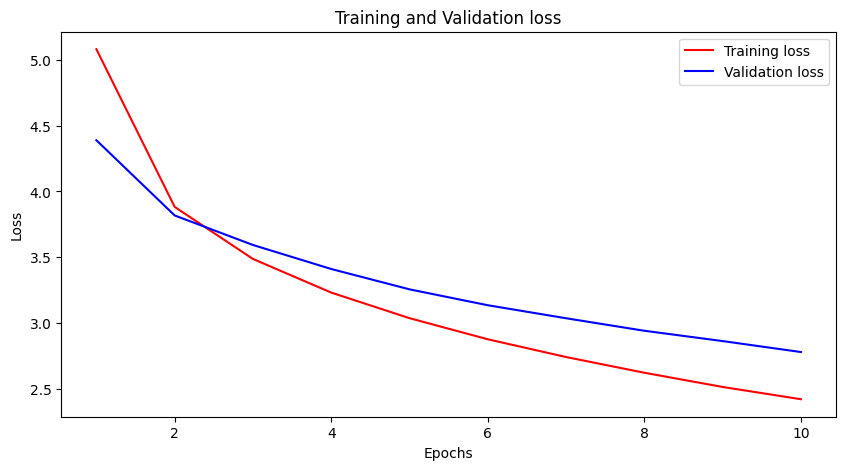

In [65]:
# Visualize the transformer training and validation loss

epochs = range(1, len(TrainLoss) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, TrainLoss, 'r', label='Training loss')
plt.plot(epochs,ValLoss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [66]:
# Load the trained state_dict into the transformer

transformer.load_state_dict(torch.load('transformer_de_to_en_model.pt',map_location=torch.device('cpu')))

<All keys matched successfully>

In [67]:
# Function to generate translations

def translate(model: torch.nn.Module, src_sentence: str):
    model.eval()
    src = text_transform[SRC_LANGUAGE](src_sentence).view(-1, 1)
    num_tokens = src.shape[0]
    src_mask = (torch.zeros(num_tokens, num_tokens)).type(torch.bool)
    tgt_tokens = greedy_decode(
        model,  src, src_mask, max_len=num_tokens + 5, start_symbol=BOS_IDX).flatten()
    return " ".join(vocab_transform[TGT_LANGUAGE].lookup_tokens(list(tgt_tokens.cpu().numpy()))).replace("<bos>", "").replace("<eos>", "")

In [68]:
# Translate the german sentence to english

for n in range(5):
    german, english= next(data_itr)

    print("German Sentence:",index_to_german(german).replace("<bos>", "").replace("<eos>", ""))
    print("English Translation:",index_to_eng(english).replace("<bos>", "").replace("<eos>", ""))
    print("Model Translation:",translate(transformer,index_to_german(german)))
    print("_________\n")

German Sentence:  Männer stehen neben irgendeiner hydraulischen Maschine . 
English Translation:  Men are standing next to some sort of hydraulic machine . 
Model Translation:  Men stand next to a basketball to some sort of some sort of water . 
_________

German Sentence:  Zwei Arbeiter reinigen nachts ein Bauwerk . 
English Translation:  Two workers are cleaning a structure at night . 
Model Translation:  Two workers are a yellow boat at night of a night . 
_________

German Sentence:  Sieben Bauarbeiter arbeiten an einem Gebäude . 
English Translation:  Seven construction workers working on a building . 
Model Translation:  Construction workers work on a building work on a building work on a building . 
_________

German Sentence:  Die Kinder spielen nachts mit Wunderkerzen . 
English Translation:  The children play with sparklers at night . 
Model Translation:  The children are playing with a green shirt is watching a few children play with a crowd of them
_________

German Sentenc

In [69]:
# Function to calculate BLEU score

import sacrebleu

def calculate_bleu_score(generated_translation, reference_translations):

    bleu_score = sacrebleu.corpus_bleu([generated_translation],[reference_translations])

    return bleu_score

In [70]:
# Calculate BLEU score of the model translation

generated_translation = translate(transformer,"Ein brauner Hund spielt im Schnee .")

reference_translations = [
    "A brown dog is playing in the snow .",
    "A brown dog plays in the snow .",
    "A brown dog is frolicking in the snow .",
    "In the snow, a brown dog is playing ."

]


bleu_score = calculate_bleu_score(generated_translation, reference_translations)
print("BLEU Score:", bleu_score, "for",generated_translation)

BLEU Score: BLEU = 27.97 53.8/41.7/27.3/10.0 (BP = 1.000 ratio = 1.444 hyp_len = 13 ref_len = 9) for  A brown dog playing in the snow with brown dog in the snow


In [71]:
# Function to translate the pdf document

import pdfplumber
import textwrap
from fpdf import FPDF

def translate_pdf(input_file, translator_model,output_file):
    translated_text = ""

    with pdfplumber.open(input_file) as pdf:

        for page in pdf.pages:
            text_content = page.extract_text()
            num_pages = len(pdf.pages)
            a4_width_mm = 210
            pt_to_mm = 0.35
            fontsize_pt = 10
            fontsize_mm = fontsize_pt * pt_to_mm
            margin_bottom_mm = 10
            character_width_mm = 7 * pt_to_mm
            width_text = a4_width_mm / character_width_mm

            pdf = FPDF(orientation='P', unit='mm', format='A4')
            pdf.set_auto_page_break(True, margin=margin_bottom_mm)
            pdf.add_page()
            pdf.set_font(family='Courier', size=fontsize_pt)
            sentences = text_content.split(".")

            for sentence in sentences:
                translated_sentence = translate(translator_model,sentence)
                lines = textwrap.wrap(translated_sentence, width_text)

                if len(lines) == 0:
                    pdf.ln()

                for wrap in lines:
                    pdf.cell(0, fontsize_mm, wrap, ln=1)

            pdf.output(output_file, 'F')

In [72]:
# Getting the pdf file to translate

!wget 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0201EN-Coursera/input_de.pdf'

--2025-12-18 11:47:32--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0201EN-Coursera/input_de.pdf
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27628 (27K) [application/pdf]
Saving to: ‘input_de.pdf.2’

input_de.pdf.2      100%[===================>]  26.98K  --.-KB/s    in 0.04s   

2025-12-18 11:47:32 (765 KB/s) - ‘input_de.pdf.2’ saved [27628/27628]



In [73]:
# Save the translated pdf file

input_file_path = "input_de.pdf"
output_file = 'output_en.pdf'
translate_pdf(input_file_path, transformer,output_file)
print("Translated PDF file is saved as:", output_file)

Translated PDF file is saved as: output_en.pdf
